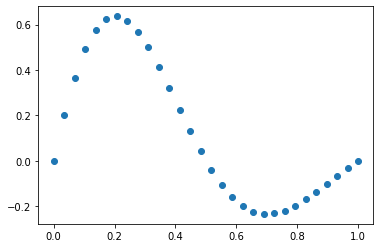

In [3]:
import numpy as np
from matplotlib.pyplot import *
x = np.linspace(0,1,30)
y = np.sin(2*np.pi*x)*np.exp(-2*x)
plot(x,y,'o')

In [4]:
from tensorflow.keras import Sequential, layers

In [8]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
h = model.fit(x,y,epochs=100,batch_size=1,verbose=0)

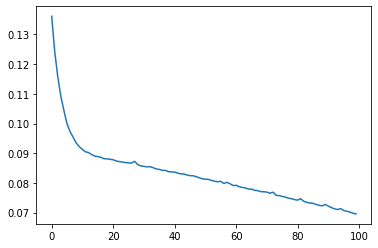

In [11]:
plot(h.epoch, h.history['loss'])

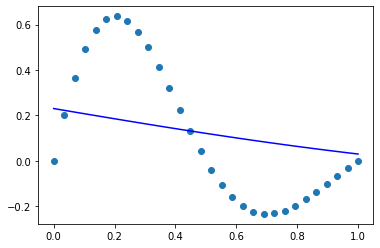

In [13]:
yp = model(x)
plot(x,y,'o',x,yp,'b')

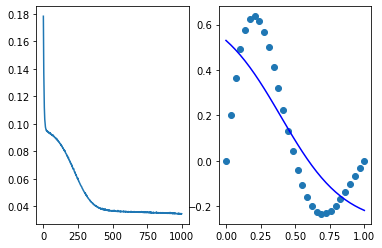

In [15]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
h = model.fit(x,y,epochs=1000,batch_size=1,verbose=0)
subplot(121);plot(h.epoch, h.history['loss'])
subplot(122);yp = model(x);plot(x,y,'o',x,yp,'b')

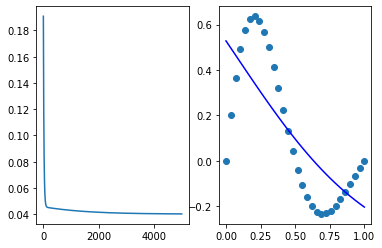

In [27]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='sgd')
h = model.fit(x,y,epochs=5000,batch_size=30,verbose=0)
subplot(121);plot(h.epoch, h.history['loss'])
subplot(122);yp = model(x);plot(x,y,'o',x,yp,'b')

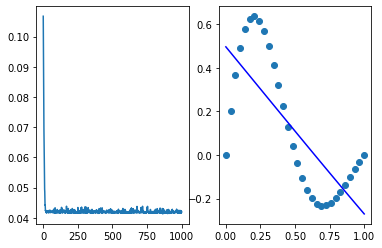

In [45]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
h = model.fit(x,y,epochs=1000,batch_size=5,verbose=0)
subplot(121);plot(h.epoch, h.history['loss'])
subplot(122);yp = model(x);plot(x,y,'o',x,yp,'b')

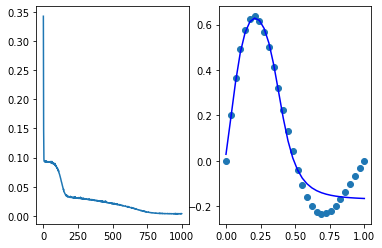

In [49]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
h = model.fit(x,y,epochs=1000,batch_size=2,verbose=0)
subplot(121);plot(h.epoch, h.history['loss'])
subplot(122);yp = model(x);plot(x,y,'o',x,yp,'b')

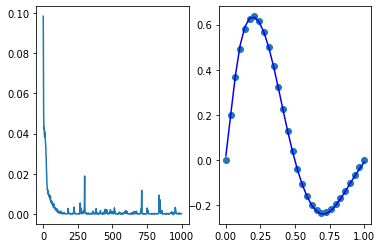

In [52]:
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(1, use_bias=False))
model.compile(loss='mse', optimizer='adam')
h = model.fit(x,y,epochs=1000,batch_size=2,verbose=0)
subplot(121);plot(h.epoch, h.history['loss'])
subplot(122);yp = model(x);plot(x,y,'o',x,yp,'b')

In [55]:
from tensorflow.keras import Model, layers
def build_model(hp):
  model = Sequential()
  model.add(layers.Input(shape=(1,)))
  hp_units = hp.Int('units', min_value=1, max_value=100, step=2)
  model.add(layers.Dense(units=hp_units))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam',loss='mse')
  return model

In [56]:
import keras_tuner as kt
tuner = kt.RandomSearch(build_model, objective='loss', max_trials=5)
tuner.search(x,y,epochs=1000)
best_model = tuner.get_best_models()[0]
best_hp = tuner.get_best_hyperparameters()[0]
tuner.results_summary()

Trial 5 Complete [00h 00m 01s]
loss: 0.08487565070390701

Best loss So Far: 0.08487565070390701
Total elapsed time: 00h 00m 04s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 99
Score: 0.08487565070390701
Trial summary
Hyperparameters:
units: 71
Score: 0.0860966220498085
Trial summary
Hyperparameters:
units: 65
Score: 0.0869387686252594
Trial summary
Hyperparameters:
units: 15
Score: 0.09766936302185059
Trial summary
Hyperparameters:
units: 3
Score: 0.13268031179904938


In [59]:
import keras_tuner as kt
tuner = kt.RandomSearch(build_model, objective='loss', max_trials=5)
tuner.search(x,y,epochs=1000)
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 07s]
loss: 0.0415668711066246

Best loss So Far: 0.0415668711066246
Total elapsed time: 00h 00m 46s
INFO:tensorflow:Oracle triggered exit


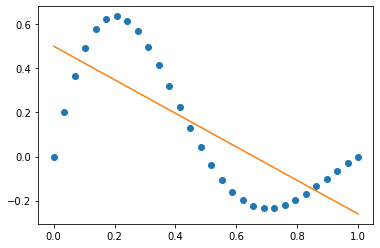

In [60]:
yp = best_model(x)
plot(x,y,'o',x,yp,'-')

In [62]:
best_hp.values

{'units': 99}

In [63]:
print(x.shape)

(30,)


In [64]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                20        
                                                                 
 dense_107 (Dense)           (None, 10)                110       
                                                                 
 dense_108 (Dense)           (None, 10)                110       
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
 dense_110 (Dense)           (None, 10)                110       
                                                                 
 dense_111 (Dense)           (None, 10)                110       
                                                                 
 dense_112 (Dense)           (None, 10)              